# Candy production increase
Data Analysis Python Pandas Statistics T-test External Dataset

The following [dataset](https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/candy_production.csv) 
shows the U.S. candy industry's 'industrial production index' 
(you can learn more [here](https://fred.stlouisfed.org/series/INDPRO#0) 
if interested, though not relevant to question).

Given the above data, determine if the production in 2015 is significantly higher than in 2016.

Solution will run t-test in python for premium users.

In [1]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/candy_production.csv'
df = pd.read_csv(url)
df.head()

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


In [2]:
df['year'] = pd.to_datetime(df['observation_date']).dt.year
df['month'] = pd.to_datetime(df['observation_date']).dt.month
d = df.query('year in [2015,2016]').pivot(index='month', columns='year', values='IPG3113N')
# this also works: df.query('year in [2015,2016]').set_index(['year','month'])[['IPG3113N']].unstack(level=0)
# this also works: obs_2016 = df.query('year == 2016')['IPG3113N']
d.head()


year,2015,2016
month,,
1,109.9525,108.5041
2,108.9073,108.1308
3,106.5261,107.9417
4,101.0631,103.6179
5,96.7802,102.0816


means: 110.85,108.50
t-test: t=0.71,p=0.49


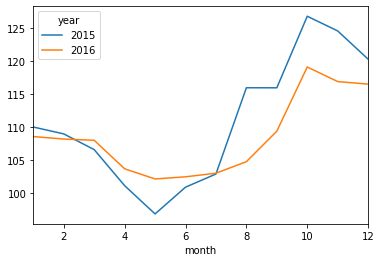

In [3]:
d15 = d[2015]
d16 = d[2016]

print(f'means: {d15.mean():.2f},{d16.mean():.2f}')
t, p = stats.ttest_ind(d15,d16)
print(f't-test: t={t:.2f},p={p:.2f}')

# show that no curve is always above the other
d.plot()
